# 0004.002 EDA - Odds - 1

In [1]:
import pathlib
# import os
import sys
# import pickle
# import inspect

import pandas as pd

import matplotlib.pyplot as plt
import ptitprince as pt

%matplotlib inline

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 2
#add the 'src' directory to path to import modules
PROJECT_DIR = pathlib.Path.cwd().resolve().parent
sys.path.append(str(PROJECT_DIR))

from src.visualization.visualize import extend_cols

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

EDA_FP = PROJECT_DIR / 'data' / 'reference' / 'eda' / 'sample.csv'

## Data Load & Restrict to Odds Data

In [2]:
df_orig = pd.read_csv(EDA_FP, parse_dates=['date']).sort_values(by=['date', 'h', 'a'])
# # Drop any all null columns
df_orig.dropna(axis=1, how='all', inplace=True)
# Get the odds columns
odds_cols = [col for col in df_orig.columns if 'odds' in col.lower()]
# But we will restrict this analysis to moneyline odds so drop the asian odds etc
odds_cols = [col for col in odds_cols if 'asian' not in col.lower()]
odds_cols = [col for col in odds_cols if '2.5odds' not in col.lower()]
# Utility function to insert meta data, target data, and columns of interest into reasonable reading order
cols = extend_cols(odds_cols)
df = df_orig[cols].copy(deep=True)
df.head()

,nation,league,season,date,h,a,h_ftGoals,a_ftGoals,h_shots,a_shots,h_shotsOnTarget,a_shotsOnTarget,result,awinOddsBbMax,awinOddsBbMean,awinOddsBet365,awinOddsBet365Indatabet,awinOddsBsa,awinOddsBwa,awinOddsGb,awinOddsIw,awinOddsLb,awinOddsPinnIndatabet,awinOddsSb,awinOddsSj,awinOddsVc,awinOddsWh,drawOddsBbMax,drawOddsBbMean,drawOddsBet365,drawOddsBet365Indatabet,drawOddsBsa,drawOddsBwa,drawOddsGb,drawOddsIw,drawOddsLb,drawOddsPinnIndatabet,drawOddsSb,drawOddsSj,drawOddsVc,drawOddsWh,hwinOddsBbMax,hwinOddsBbMean,hwinOddsBet365,hwinOddsBet365Indatabet,hwinOddsBsa,hwinOddsBwa,hwinOddsGb,hwinOddsIw,hwinOddsLb,hwinOddsPinnIndatabet,hwinOddsSb,hwinOddsSj,hwinOddsVc,hwinOddsWh
0,germany,bundesliga,2007-2008,2007-08-10,stuttgart,schalke,2.0,2.0,16,10,7,4,draw,3.20,2.92,2.87,3.0,2.88,2.85,2.90,2.8,3.0,NaN,2.85,3.00,2.8,NaN,3.30,3.18,3.25,3.25,3.2,3.20,3.20,3.1,3.20,NaN,3.25,3.20,3.25,NaN,2.55,2.30,2.37,2.10,2.2,2.30,2.35,2.3,2.10,NaN,2.25,2.20,2.25,NaN
1,germany,bundesliga,2007-2008,2007-08-11,bayern-munich,hansa-rostock,3.0,0.0,27,6,13,0,hwin,21.00,13.40,19.00,10.0,11.00,12.25,13.00,11.0,11.0,NaN,11.00,15.00,13.0,NaN,6.80,5.89,6.00,5.50,5.5,6.75,6.00,5.2,5.00,NaN,5.75,5.75,6.00,NaN,1.20,1.18,1.16,1.20,1.2,1.15,1.20,1.2,1.20,NaN,1.20,1.17,1.14,NaN
2,germany,bundesliga,2007-2008,2007-08-11,bochum,sv-werder-bremen,2.0,2.0,17,20,4,9,draw,2.22,1.99,2.05,2.0,1.91,1.90,2.05,2.1,2.0,NaN,2.00,1.91,1.9,NaN,3.40,3.24,3.30,3.25,3.3,3.25,3.25,3.1,3.20,NaN,3.30,3.40,3.25,NaN,3.75,3.44,3.50,3.25,3.5,3.70,3.50,3.2,3.20,NaN,3.35,3.60,3.50,NaN
3,germany,bundesliga,2007-2008,2007-08-11,eintracht-frankfurt,hertha-berlin,1.0,0.0,19,10,5,3,hwin,3.30,2.86,2.90,2.7,2.75,2.85,3.00,3.0,2.6,NaN,2.80,2.80,2.9,NaN,3.30,3.18,3.20,3.20,3.2,3.20,3.20,3.1,3.20,NaN,3.25,3.20,3.20,NaN,2.50,2.33,2.37,2.29,2.3,2.30,2.30,2.2,2.37,NaN,2.30,2.38,2.20,NaN
4,germany,bundesliga,2007-2008,2007-08-11,hannover,hamburger-sv,0.0,1.0,10,14,2,8,awin,2.85,2.60,2.75,2.5,2.50,2.60,2.60,2.6,2.4,NaN,2.40,2.62,2.7,NaN,3.25,3.17,3.20,3.20,3.2,3.05,3.20,3.1,3.25,NaN,3.25,3.20,3.10,NaN,2.80,2.55,2.50,2.50,2.5,2.60,2.60,2.5,2.50,NaN,2.65,2.50,2.40,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 55 columns):
nation                     918 non-null object
league                     918 non-null object
season                     918 non-null object
date                       918 non-null datetime64[ns]
h                          918 non-null object
a                          918 non-null object
h_ftGoals                  918 non-null float64
a_ftGoals                  918 non-null float64
h_shots                    918 non-null int64
a_shots                    918 non-null int64
h_shotsOnTarget            918 non-null int64
a_shotsOnTarget            918 non-null int64
result                     918 non-null object
awinOddsBbMax              918 non-null float64
awinOddsBbMean             918 non-null float64
awinOddsBet365             918 non-null float64
awinOddsBet365Indatabet    917 non-null float64
awinOddsBsa                917 non-null float64
awinOddsBwa                918 non-nul

## Odds

Each bookie publishes a set of moneyline odds - these are the 1X2 odds - odds for Home win, Draw, Away Win

+ Review of a single sample bookie's odds - bet365

+ How close are the bookies

+ Line chart of Odds

+ What are the distributions of odds? - Waterfall chart

+ Odds as Probabilities 

## Group together a few different bookmakers odds and review

In [4]:
hwin_cols = [col for col in df.columns if 'hwinOdds' in col and ('Max' not in col and 'Mean' not in col)]
draw_cols = [col for col in df.columns if 'drawOdds' in col and ('Max' not in col and 'Mean' not in col)]
awin_cols = [col for col in df.columns if 'awinOdds' in col and ('Max' not in col and 'Mean' not in col)]
hwin_odds = pd.melt(df[hwin_cols], value_vars=hwin_cols, var_name='bet_type', value_name='odds')
draw_odds = pd.melt(df[draw_cols], value_vars=draw_cols, var_name='bet_type', value_name='odds')
awin_odds = pd.melt(df[awin_cols], value_vars=awin_cols, var_name='bet_type', value_name='odds')
hwin_odds['bet_type'] = 'hwinOdds' ; draw_odds['bet_type'] = 'drawOdds' ; awin_odds['bet_type'] = 'awinOdds'
all_odds_df = pd.concat([hwin_odds, draw_odds, awin_odds], axis=0).reset_index(drop=True)
all_odds_df.dropna(subset=['odds'], axis=0, inplace=True)
all_odds_df.head()

,bet_type,odds
0,hwinOdds,2.37
1,hwinOdds,1.16
2,hwinOdds,3.50
3,hwinOdds,2.37
4,hwinOdds,2.50


In [5]:
all_odds_df.tail()

,bet_type,odds
33043,awinOdds,2.30
33044,awinOdds,5.50
33045,awinOdds,1.91
33046,awinOdds,4.80
33047,awinOdds,4.20


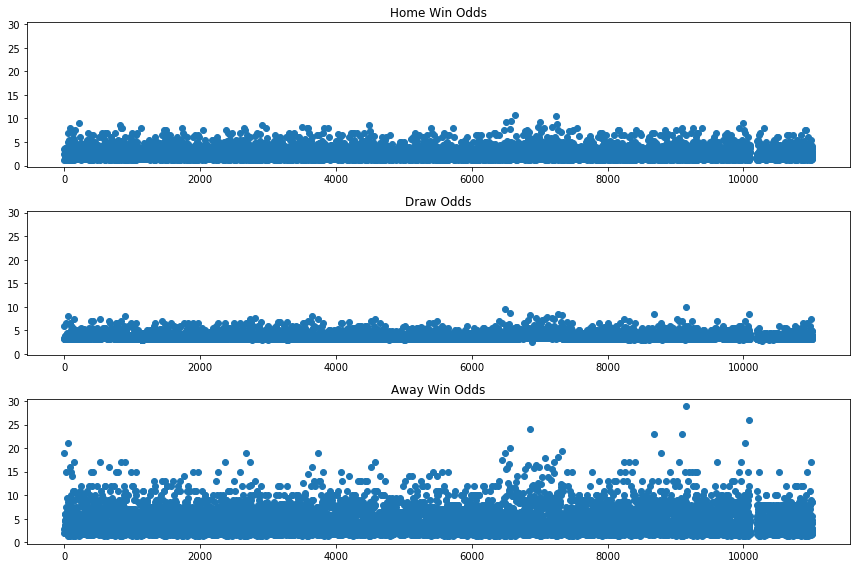

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(12,8), sharey=True)
ax1.set_title('Home Win Odds')
ax1.plot(hwin_odds['odds'], 'o')
ax2.set_title('Draw Odds')
ax2.plot(draw_odds['odds'], 'o')
ax3.set_title('Away Win Odds')
ax3.plot(awin_odds['odds'], 'o')
plt.tight_layout()
plt.show()

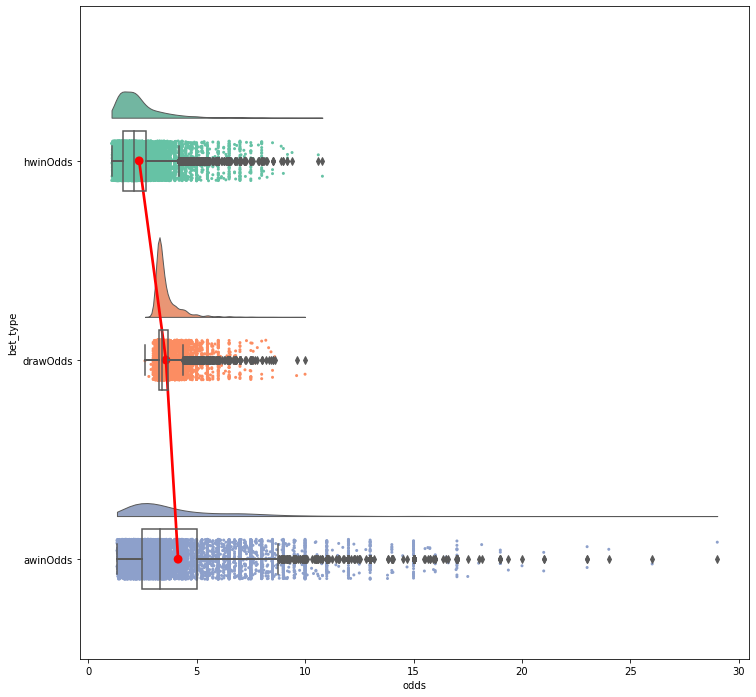

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
ax = pt.RainCloud(x='bet_type', y='odds', data=all_odds_df, width_viol=0.8, width_box=0.3,
                  orient='h', pointplot=True)
plt.show();

In [8]:
all_odds_df = pd.concat([hwin_odds, draw_odds, awin_odds], axis=1).reset_index(drop=True)
desc = all_odds_df.describe()
desc.columns=['hwinOdds', 'drawOdds', 'awinOdds']
desc

,hwinOdds,drawOdds,awinOdds
count,10893.000000,10893.000000,10893.00000
mean,2.352436,3.588711,4.14798
std,1.075813,0.594066,2.51030
min,1.080000,2.620000,1.33000
25%,1.620000,3.250000,2.50000
50%,2.100000,3.400000,3.30000
75%,2.650000,3.700000,5.00000
max,10.800000,10.000000,29.00000


## Comments

+ This data is for multiple bookmakers over 3 seasons
+ There is a hard limit on the lower end of the home win odds(1.08) and away win odds (1.33)
+ Looking at the raincloud plot, it seems like there is almost a hard limit on the lower end of the draw odds (>2.62)
+ The draw odds are far more tightly distributed than the other odds
+ The awin win odds have a very long tail compared to the other odds The maximum is 29 compared to 10.8 for home win odds, and 10 for draw odds